In [ ]:
from google.colab import files
uploaded=files.upload()

Saving E Commerce Dataset.xlsx to E Commerce Dataset.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Exploration

Dataset sudah di-unduh dan di-explore apa saja attributes-nya dan targetnya output olahan datanya

In [ ]:
import pandas as pd
import io
data=pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df=df.drop(columns='CustomerID')

In [ ]:
df[['Churn','CityTier','SatisfactionScore','Complain']]=df[['Churn','CityTier','SatisfactionScore','Complain']].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [ ]:
cats=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Churn','CityTier','SatisfactionScore','Complain']
nums=['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [ ]:
df[nums].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


- perlu dilihat datanya kembali untuk kolom yang memiliki nilai minimal != 0 (WarehouseToHome, OrderAmountHikeFromlastYear, OrderCount, DaySinceLastOrder)

In [ ]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn,CityTier,SatisfactionScore,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,3,7,2,6,3,2,3,5,2
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,0,1,3,0
freq,2765,2314,3384,2050,2986,4682,3666,1698,4026


terdapat data yang imbalance seperti: PreferredPaymentMode, PreferedOrderCat, Churn, CityTier, Complain

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64


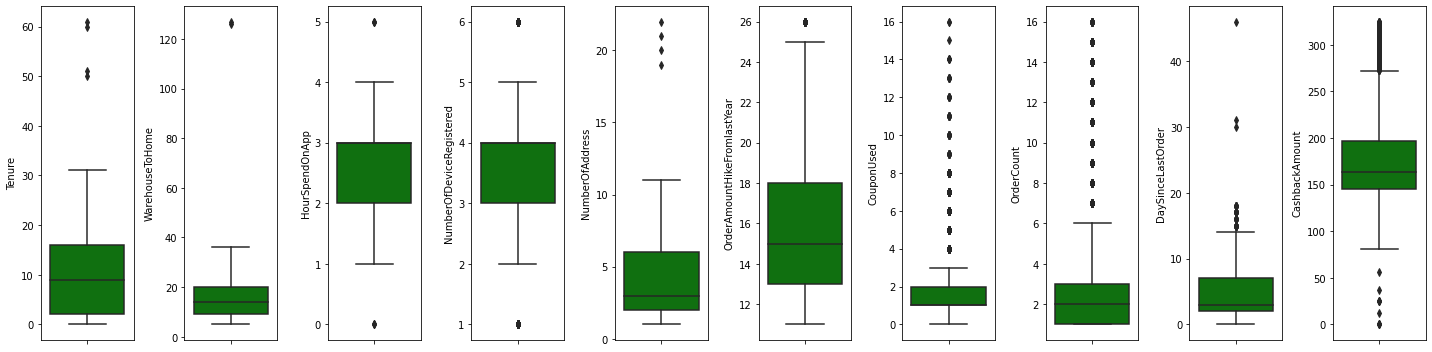

In [ ]:
plt.figure(figsize=(20,5))
for i in range(0,len(nums)):
    plt.subplot(1,len(nums),i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

- terdapat banyak outlier pada setiap kolom numerical pada data 
- data terlihat skewed.

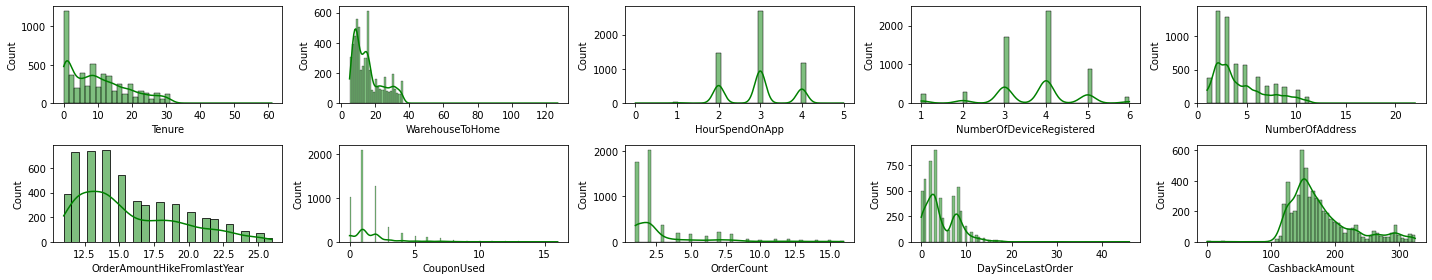

In [ ]:
plt.figure(figsize=(20,4))
for i in range (0,len(nums)):
    plt.subplot(2,5,i+1)
    sns.histplot(df[nums[i]],color='green', kde=True)
    plt.tight_layout()

- data terlihat positively skewed
- tenure customer mayoritas dibawah 20 bulan
- sebaran coupon used dan ordercount perlu dperhatikan

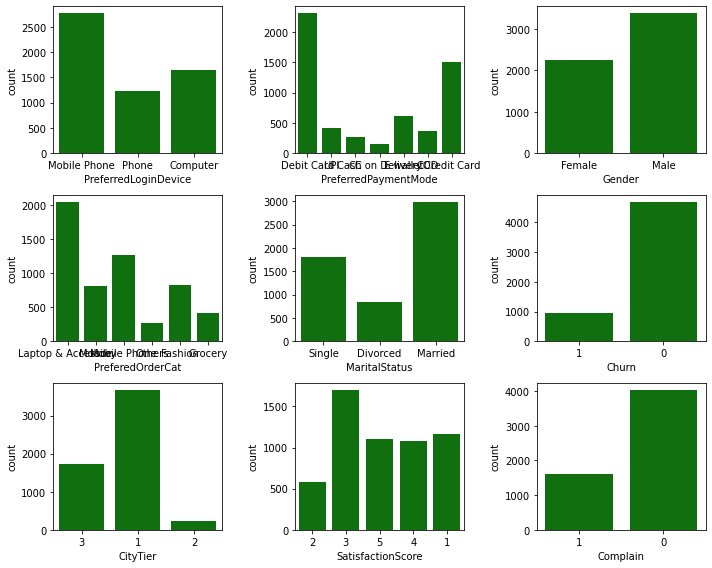

In [ ]:
plt.figure(figsize=(10,8))
for i in range (0,len(cats)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[cats[i]],color='green')
    plt.tight_layout()

- Pada preferred login device: ada kategori mobile phone dan phone, perlu di gabung?
- Pada preferred payment method: ada kategori COD dan Cash on delivery, perlu di gabung?
- perbandingan churn yes dan no dibawah 20:80

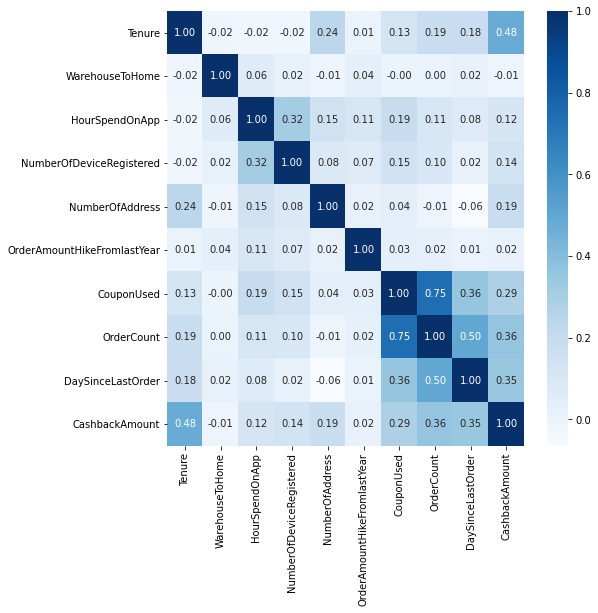

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

korelasi kuat: DaySinceLastOrder & OrderCount, OrderCount & CouponUsed <br>
korelasi Lemah: CashbackAmount & Tenure, CashbackAmount & OrderCount, CashbackAmount & DaySinceLastOrder, DaySinceLastOrder & CouponUsed

# Data Cleansing

In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Missing Data

In [ ]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4192,54193,0,4.0,Phone,1,16.0,Credit Card,Male,3.0,5,Mobile Phone,3,Single,3,0,14.0,1.0,2.0,9.0,147.06
3271,53272,0,4.0,Mobile Phone,1,7.0,Debit Card,Male,3.0,6,Mobile Phone,3,Divorced,5,0,22.0,2.0,2.0,3.0,163.33
2915,52916,0,31.0,Phone,1,10.0,Debit Card,Male,4.0,5,Mobile Phone,2,Divorced,5,0,18.0,1.0,2.0,1.0,146.77
5495,55496,0,13.0,Mobile Phone,1,26.0,UPI,Male,3.0,4,Laptop & Accessory,1,Married,10,0,15.0,1.0,3.0,3.0,164.02
5613,55614,0,10.0,Mobile Phone,3,18.0,E wallet,Female,4.0,5,Laptop & Accessory,1,Married,6,0,14.0,2.0,2.0,1.0,191.52


In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

- data NaN pada kolom WarehouseToHome, OrderAmountHikeFromlastYear, OrderCount, DaySinceLastOrder, di nol kan <br>
- data pada hourspend hanya 3 yg nol, yang lain NaN
- data nan yg lain diisi median karena persebarannya yang skewed

In [ ]:
df['Tenure'].fillna(value=df['CouponUsed'].median(), inplace=True)
df['WarehouseToHome'].fillna(0, inplace=True)
df['HourSpendOnApp'].fillna(0, inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(0, inplace=True)
df['CouponUsed'].fillna(value=df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(0, inplace=True)
df['DaySinceLastOrder'].fillna(value=df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Drop customerID and duplicates

In [ ]:
df=df.drop(columns='CustomerID')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## Hapus Outlier

In [ ]:
print(cats)
print(nums)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Churn', 'CityTier', 'SatisfactionScore', 'Complain']
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [ ]:
#hapus outlier pake zscore hanya kalau distribusinya mendekati normal.

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df)) 

for col in ['CashbackAmount']:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5073
Jumlah baris setelah memfilter outlier: 5064


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['WarehouseToHome','DaySinceLastOrder','NumberOfAddress','OrderAmountHikeFromlastYear','Tenure']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5064
Jumlah baris setelah memfilter outlier: 4692


## Merubah data numerik ke logaritmik

In [ ]:
df_log=np.log(df[nums]+1)

In [ ]:
df_log

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.609438,1.945910,1.386294,1.386294,2.302585,2.484907,0.693147,0.693147,1.791759,5.080969
1,0.693147,2.197225,1.386294,1.609438,2.079442,2.772589,0.000000,0.693147,0.000000,4.803201
2,0.693147,3.433987,1.098612,1.609438,1.945910,2.708050,0.000000,0.693147,1.386294,4.798102
3,0.000000,2.772589,1.098612,1.609438,2.197225,3.178054,0.000000,0.693147,1.386294,4.905793
4,0.000000,2.564949,0.000000,1.386294,1.386294,2.484907,0.693147,0.693147,1.386294,4.872139
...,...,...,...,...,...,...,...,...,...,...
5623,1.791759,2.564949,1.609438,1.609438,1.098612,3.044522,1.098612,1.098612,1.386294,5.417699
5624,0.693147,2.564949,1.098612,1.791759,1.098612,2.995732,1.098612,1.098612,0.693147,5.047674
5626,2.639057,2.639057,1.386294,1.791759,1.945910,2.833213,0.693147,1.098612,1.386294,5.420137
5627,0.693147,2.484907,1.386294,1.098612,1.386294,3.091042,0.693147,1.098612,1.609438,5.233352


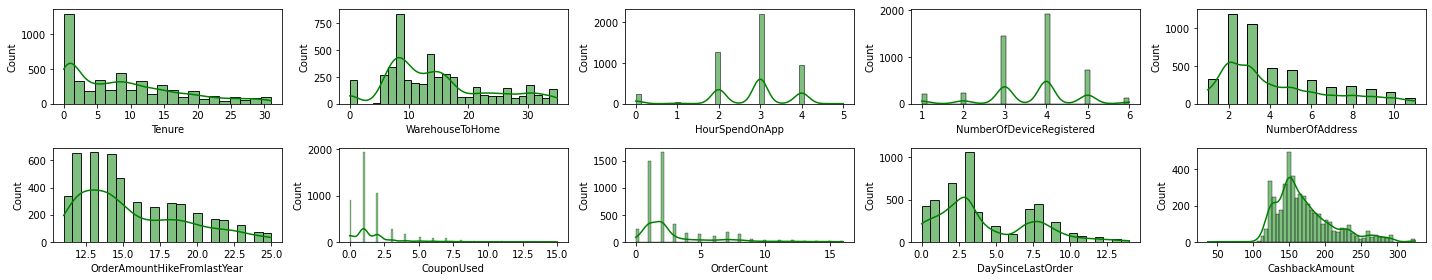

In [ ]:
#Persebaran data sebelum ditransform jadi logaritmik
plt.figure(figsize=(20,4))
for i in range (0,len(nums)):
    plt.subplot(2,5,i+1)
    sns.histplot(df[nums[i]],color='green', kde=True)
    plt.tight_layout()

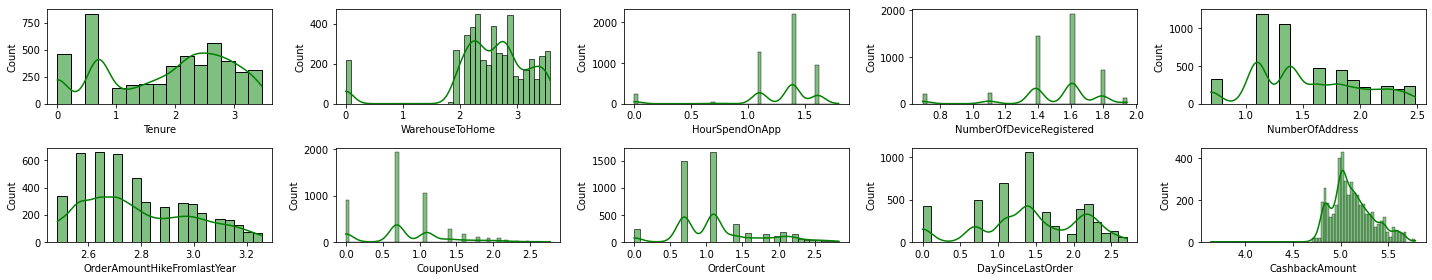

In [ ]:
# Persebaran data setelah di transform ke logaritmik
plt.figure(figsize=(20,4))
for i in range (0,len(nums)):
    plt.subplot(2,5,i+1)
    sns.histplot(df_log[nums[i]],color='green', kde=True)
    plt.tight_layout()

- data setelah di transformasi ke logaritmik masih terlihat skewed

## Pairplot

<Figure size 1080x1080 with 0 Axes>

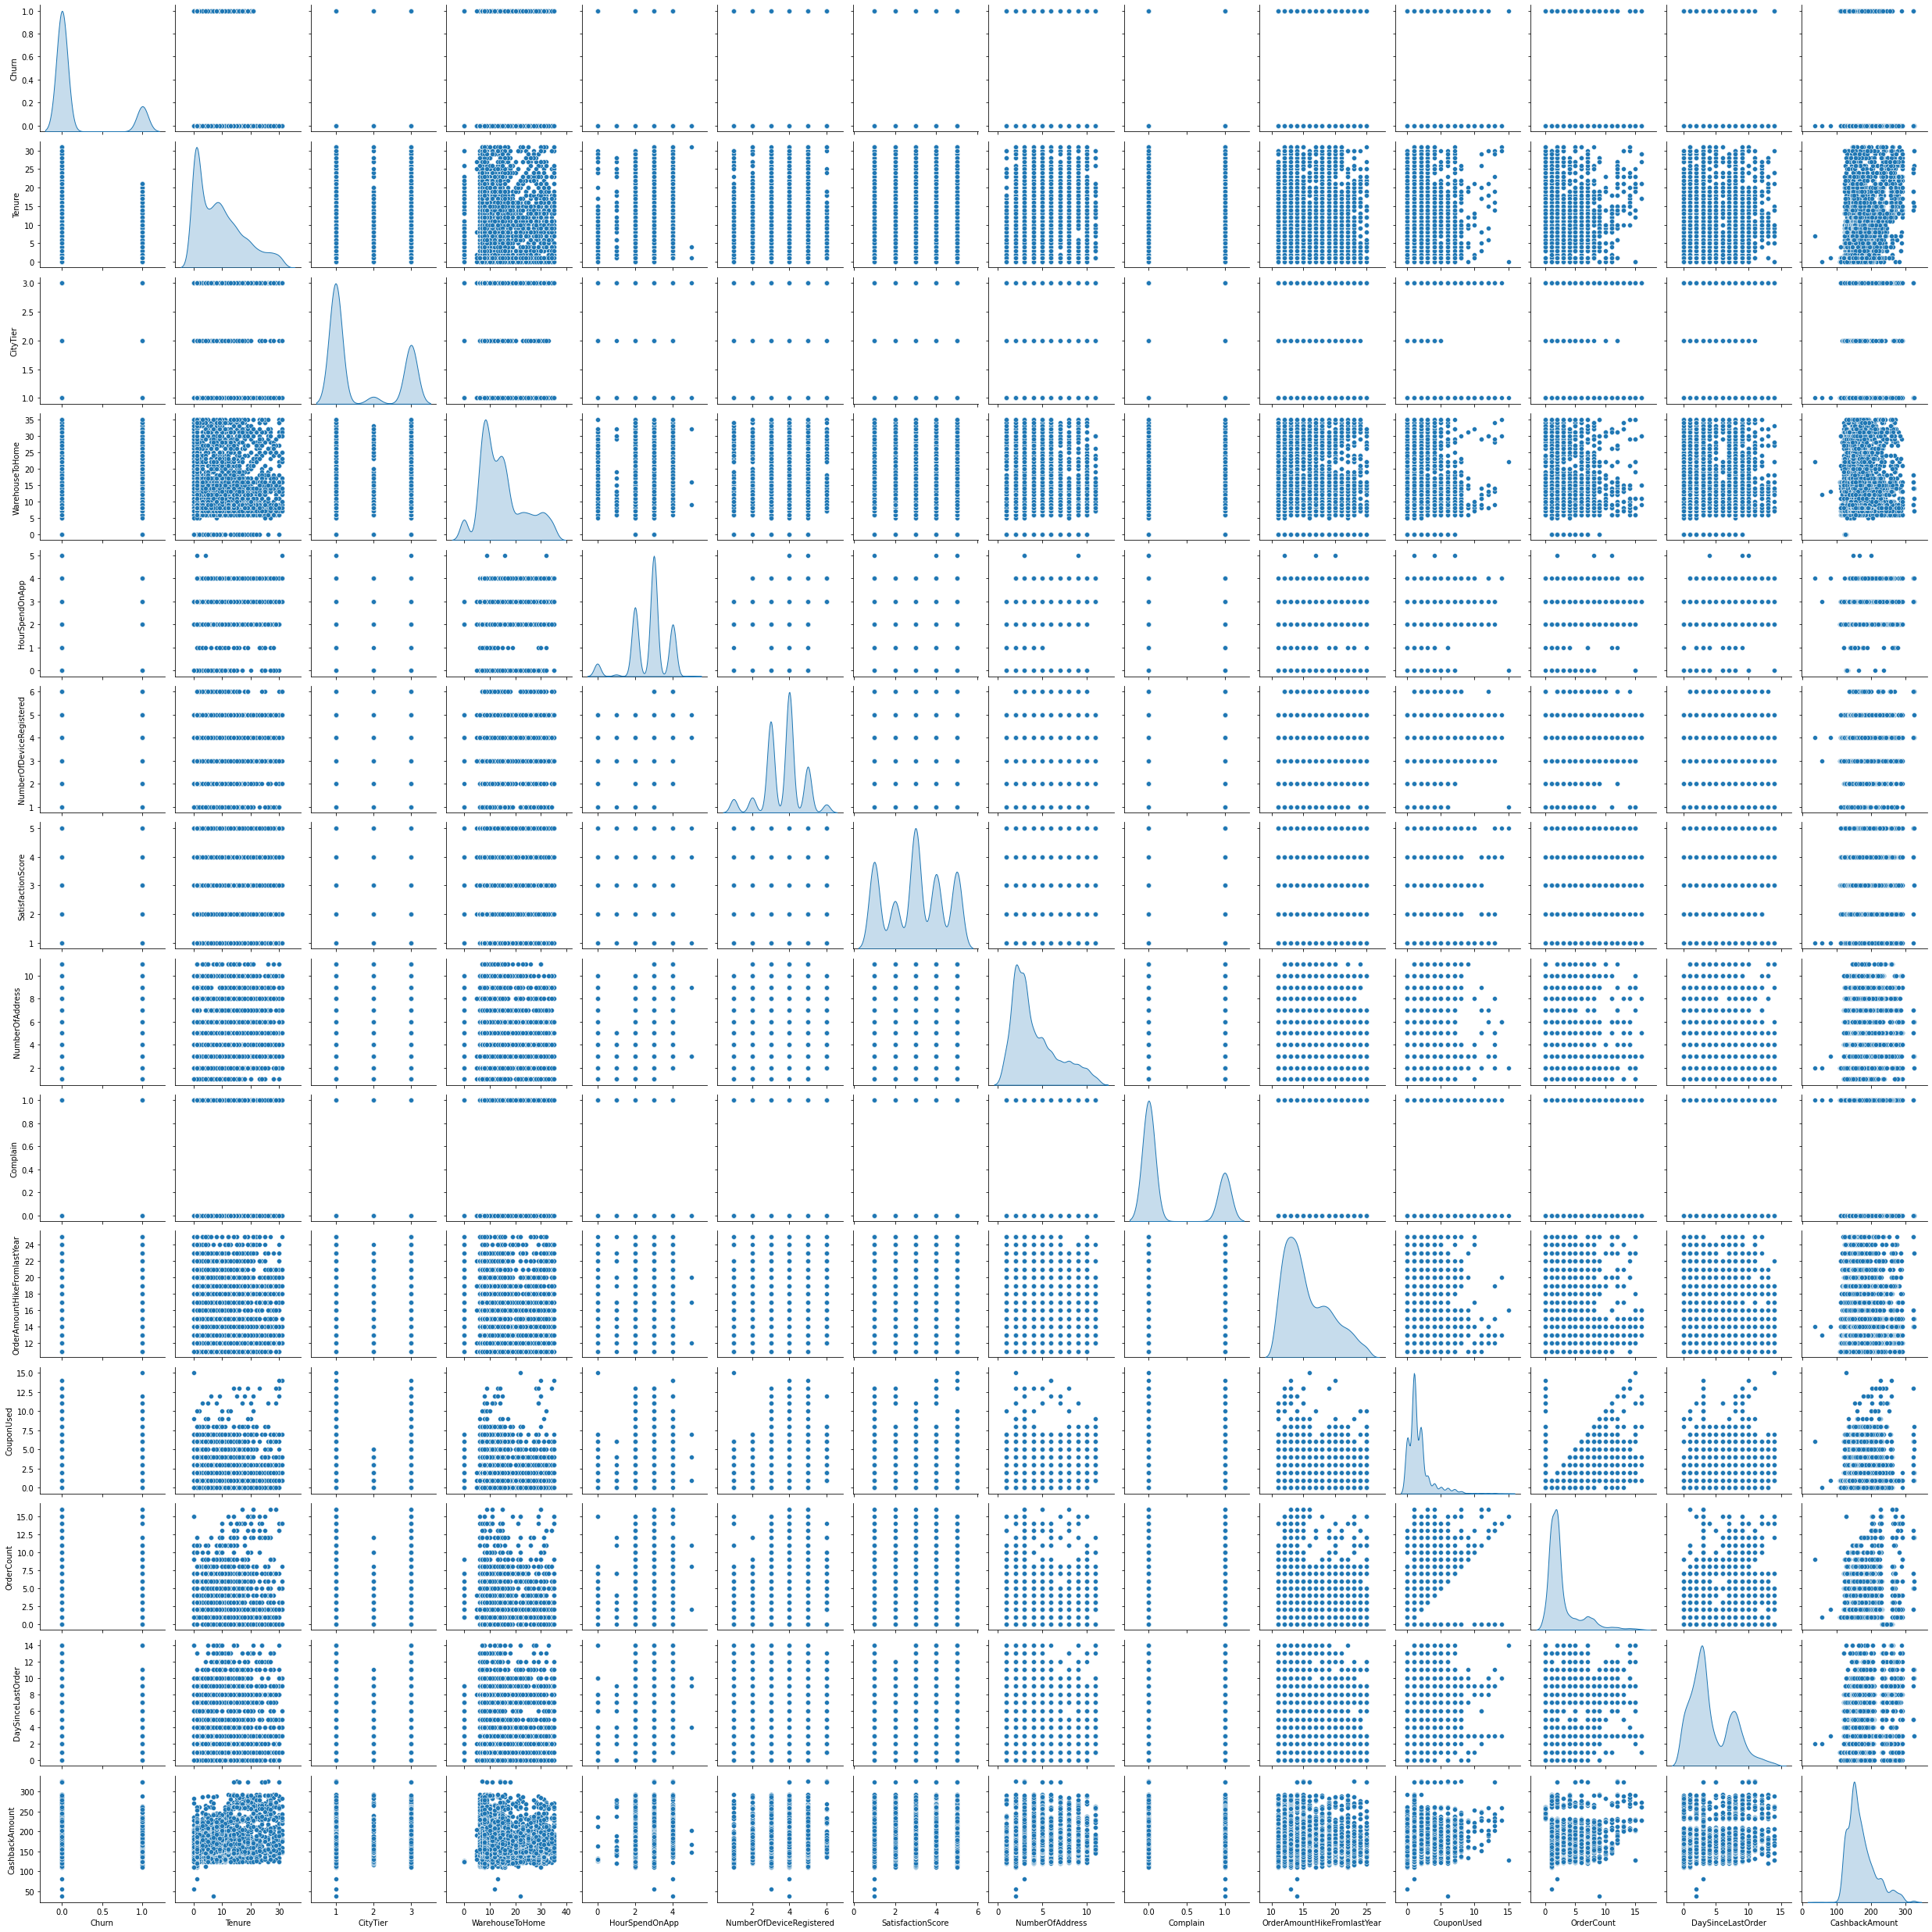

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

<Figure size 720x1080 with 0 Axes>

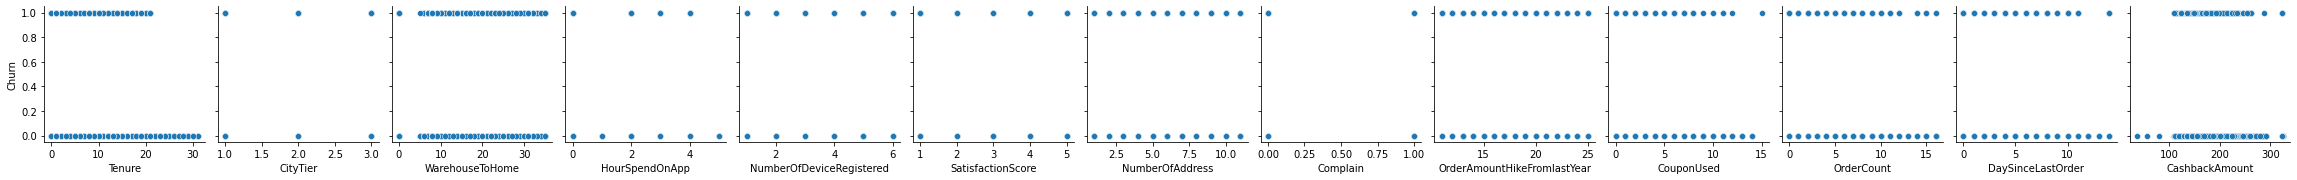

In [ ]:
plt.figure(figsize=(10, 15))
sns.pairplot(data=df,
                  y_vars=['Churn'],
                  x_vars=['Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
                          'NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount'])

yg berhubungan dgn churn menurut pairplotnya: 
1. tenure (orang yang churn tenurenya lebih rendah)
2. coupon used (org yang churn menggunakan coupon lebih sedikit)
3. day since last order (orang yang churn day since last ordernya lebih kecil)
4. cashback amount (orang yang churn cashback relatif lebih rendah)
5. hourspend (orang yang churn hourspend on app lebih rendah)

# Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df['CashbackAmount_norm'] = StandardScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))

In [ ]:
df[['CashbackAmount_norm']].describe()

,CashbackAmount_norm
count,4.692000e+03
mean,9.051559e-16
std,1.000107e+00
min,-3.348855e+00
25%,-6.398176e-01
50%,-2.494115e-01
75%,4.685046e-01
max,3.867643e+00


## one hot encoding

In [ ]:
fitur=cats=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [ ]:
for cat in cats:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_norm,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
5138,0,14.0,Mobile Phone,1,9.0,Credit Card,Female,3.0,2,Laptop & Accessory,3,Married,7,0,21.0,7.0,12.0,9.0,188.77,0.454221,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5516,0,15.0,Mobile Phone,3,15.0,E wallet,Female,3.0,4,Laptop & Accessory,4,Married,7,0,22.0,1.0,2.0,5.0,168.93,-0.042932,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2968,0,1.0,Computer,1,7.0,Debit Card,Female,3.0,4,Laptop & Accessory,4,Married,3,0,21.0,1.0,2.0,5.0,188.97,0.459233,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1800,0,6.0,Mobile Phone,1,6.0,Credit Card,Female,3.0,1,Grocery,3,Married,5,0,19.0,1.0,1.0,5.0,261.84,2.285221,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2649,0,13.0,Phone,1,18.0,Debit Card,Female,2.0,3,Laptop & Accessory,5,Married,3,0,12.0,1.0,7.0,7.0,144.48,-0.655604,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_new = df.drop(columns=cats).copy()

In [ ]:
df_log.head(20)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.609438,1.945910,1.386294,1.386294,2.302585,2.484907,0.693147,0.693147,1.791759,5.080969
1,0.693147,2.197225,1.386294,1.609438,2.079442,2.772589,0.000000,0.693147,0.000000,4.803201
2,0.693147,3.433987,1.098612,1.609438,1.945910,2.708050,0.000000,0.693147,1.386294,4.798102
3,0.000000,2.772589,1.098612,1.609438,2.197225,3.178054,0.000000,0.693147,1.386294,4.905793
4,0.000000,2.564949,0.000000,1.386294,1.386294,2.484907,0.693147,0.693147,1.386294,4.872139
5,0.000000,3.135494,1.386294,1.791759,1.098612,3.135494,1.609438,1.945910,2.079442,4.942999
6,0.693147,2.484907,1.098612,1.386294,1.609438,2.708050,0.000000,0.693147,0.000000,4.802873
7,0.693147,1.945910,1.386294,1.386294,1.386294,2.833213,1.098612,1.098612,0.000000,4.819717
8,2.639057,2.302585,0.000000,1.609438,1.098612,2.708050,0.000000,0.693147,1.098612,4.850701
9,0.693147,3.465736,1.098612,1.791759,1.098612,2.564949,0.693147,0.693147,0.693147,4.819717


In [ ]:
df_log.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,4692.0,1.878940,1.036686,0.000000,0.693147,2.197225,2.708050,3.465736
WarehouseToHome,4692.0,2.554631,0.731268,0.000000,2.197225,2.639057,2.995732,3.583519
HourSpendOnApp,4692.0,1.281289,0.345562,0.000000,1.098612,1.386294,1.386294,1.791759
NumberOfDeviceRegistered,4692.0,1.510247,0.255532,0.693147,1.386294,1.609438,1.609438,1.945910
NumberOfAddress,4692.0,1.523941,0.469320,0.693147,1.098612,1.386294,1.945910,2.484907
OrderAmountHikeFromlastYear,4692.0,2.789815,0.206794,2.484907,2.639057,2.772589,2.944439,3.258097
CouponUsed,4692.0,0.823272,0.549085,0.000000,0.693147,0.693147,1.098612,2.772589
OrderCount,4692.0,1.134247,0.572234,0.000000,0.693147,1.098612,1.386294,2.833213
DaySinceLastOrder,4692.0,1.440184,0.687282,0.000000,1.098612,1.386294,2.079442,2.708050
CashbackAmount,4692.0,5.120884,0.217366,3.637586,4.984360,5.085681,5.248812,5.786867


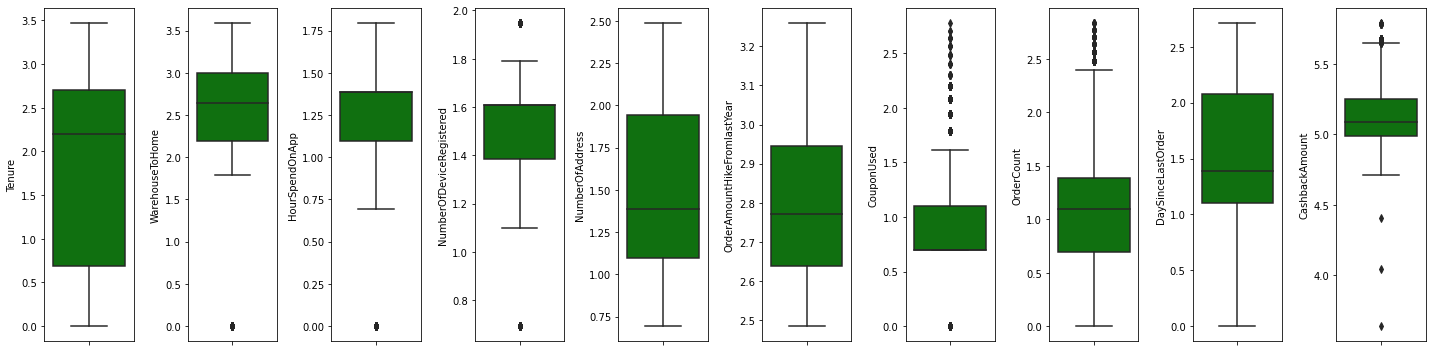

In [ ]:
plt.figure(figsize=(20,5))
for i in range(0,len(nums)):
    plt.subplot(1,len(nums),i+1)
    sns.boxplot(y=df_log[nums[i]],color='green',orient='v')
    plt.tight_layout()

# Insights 

## Tenure

### Boxplot Tenure dan churn

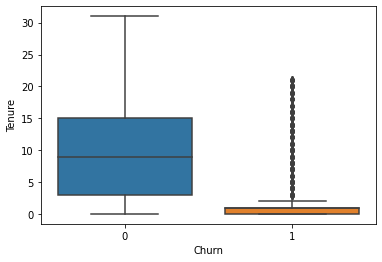

In [ ]:
sns.boxplot(x="Churn", y="Tenure", data=df)

- mayoritas cust churn dibawah 5 tahun.

### Histogram Tenure dan Churn

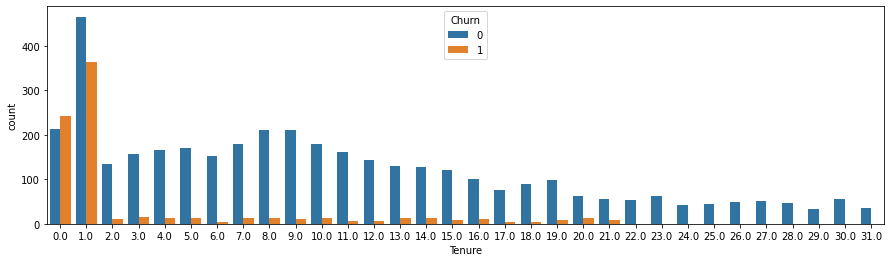

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Tenure',hue='Churn')

- tenure=1/churn (https://rowansimpson.com/2014/11/26/estimating-tenure/)
- tenure harus dipisah menjadi beberapa segmen terlebih dahulu agar dapat diinterpretasikan lebih jelas ()

### Churn rate pada tenure 

In [ ]:
df['no']=np.arange(len(df)) #bikin cust id karena diatas sudah di drop untuk count duplicate

In [ ]:
df_group=df.groupby(['Tenure','Churn'])['no'].count().reset_index()
df_group["total"]=df_group.groupby(['Tenure'])['no'].transform('sum')
df_group=df_group.loc[df_group['Churn']==1].copy()
df_group['churn_rate']=df_group['no']/df_group['total']*100
df_group

,Tenure,Churn,no,total,churn_rate
1,0.0,1,242,456,53.070175
3,1.0,1,365,831,43.922984
5,2.0,1,10,145,6.896552
7,3.0,1,15,173,8.670520
9,4.0,1,14,179,7.821229
11,5.0,1,13,183,7.103825
13,6.0,1,5,158,3.164557
15,7.0,1,13,193,6.735751
17,8.0,1,13,224,5.803571
19,9.0,1,10,221,4.524887


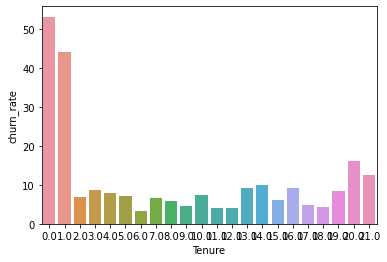

In [ ]:
sns.barplot(x='Tenure',y='churn_rate', data=df_group)

### Segmentasi Tenure

bikin segmentasi 0-6,7-12,13-18, 19-24, diatas 24 bulan

In [ ]:
def segment(x):
    if x['Tenure']>24:
        segment= '>24'
    elif x['Tenure']>18 and x['Tenure']<=24:
        segment='19-24'
    elif x['Tenure']>12 and x['Tenure']<=18:
        segment='13-18'
    elif x['Tenure']>6 and x['Tenure']<=12:
        segment='7-12'
    else: 
        segment='<6'
    return segment
        
df['segment_tenure']=df.apply(lambda x: segment(x), axis=1)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_norm,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,no,segment_tenure
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,-0.268456,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,<6
1,1,1.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,-1.246475,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,<6
2,1,1.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,-1.262012,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,2,<6
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,-0.916460,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,3,<6
4,1,0.0,Phone,1,12.0,CC,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,-1.028470,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,4,<6


In [ ]:
df_tenure=df.groupby(['segment_tenure','Churn']).size().unstack()
df_tenure

Churn,0,1
segment_tenure,,
13-18,645.0,53.0
19-24,375.0,29.0
7-12,1086.0,63.0
<6,1461.0,664.0
>24,316.0,NaN


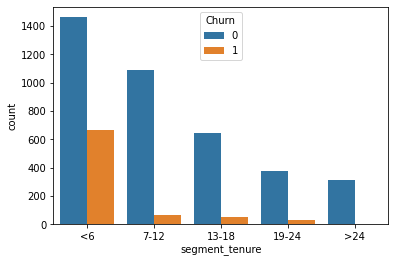

In [ ]:
sns.countplot(data=df, x='segment_tenure',hue='Churn', order=['<6','7-12','13-18','19-24','>24'])

- jumlah orang yang churn semakin sedikit seiring dengan bertambahnya tenure (1/churn)

### Tenure vs fitur-fitur

In [ ]:
df_tenure=df[['Tenure','segment_tenure','SatisfactionScore','CashbackAmount','CouponUsed','DaySinceLastOrder','HourSpendOnApp','Churn','Complain','OrderCount','no']]
df_tenure_group=df_tenure.groupby(['segment_tenure','Churn']).agg({'SatisfactionScore':'mean','CashbackAmount':'median','CouponUsed':'median','DaySinceLastOrder':'median','HourSpendOnApp':'mean','OrderCount':'median'}).reset_index()
df_tenure_group

,segment_tenure,Churn,SatisfactionScore,CashbackAmount,CouponUsed,DaySinceLastOrder,HourSpendOnApp,OrderCount
0,13-18,0,2.975194,170.230,1.0,3.0,2.843411,2.0
1,13-18,1,3.056604,192.280,1.0,3.0,2.754717,2.0
2,19-24,0,3.242667,189.340,1.0,4.0,2.864000,2.0
3,19-24,1,2.896552,174.630,2.0,3.0,3.068966,4.0
4,7-12,0,2.906077,165.465,1.0,3.0,2.815838,2.0
5,7-12,1,3.285714,178.810,1.0,3.0,3.031746,2.0
6,<6,0,2.916496,151.470,1.0,3.0,2.704997,2.0
7,<6,1,3.367470,148.400,1.0,2.0,2.725904,2.0
8,>24,0,2.911392,205.120,1.0,3.0,2.715190,2.0


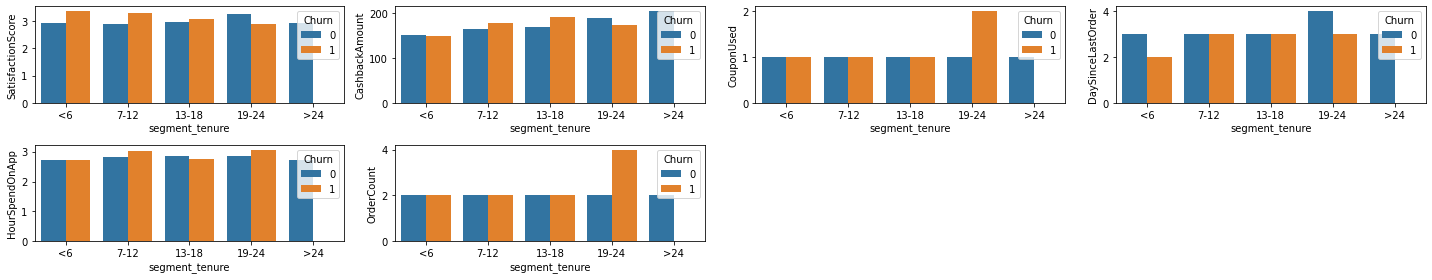

In [ ]:
fitur=['SatisfactionScore','CashbackAmount','CouponUsed','DaySinceLastOrder','HourSpendOnApp','OrderCount']
plt.figure(figsize=(20,4))
for i in range (0,len(fitur)):
    plt.subplot(2,4,i+1)
    sns.barplot(x='segment_tenure',y=fitur[i],data=df_tenure_group, hue='Churn', order=['<6','7-12','13-18','19-24','>24'])
    plt.tight_layout()

- dalam segmentasi tenure dibawah 18 bulan, orang yang churn memberi rata-rata satisfaction score diatas orang yang tidak churn 
- satisfaction score: cust yang churn memberi score makin rendah seiring bertambahnya tenure
- cashback amount cust yang tidak churn bertambah sesuai segmentasi tenure
- cashback amount: terjadi penurunan churn di bulan yg 19-24, mungkin jumlah cashback yang semakin besar mempengaruhi loyalitas cust thdp marketplace.
- ordercount dan coupon used tinggi di segment_tenure 19-24

### Tenure vs complain

In [ ]:
df_complain=df.groupby(['segment_tenure','Complain','Churn']).size().unstack()
df_complain

Churn                         0      1
segment_tenure Complain               
13-18          0          450.0   23.0
               1          195.0   30.0
19-24          0          281.0   14.0
               1           94.0   15.0
7-12           0          840.0   41.0
               1          246.0   22.0
<6             0         1176.0  299.0
               1          285.0  365.0
>24            0          223.0    NaN
               1           93.0    NaN

In [ ]:
df_complain_new=(df_complain.T*100.0/df_complain.T.sum()).T.reset_index()

df_complain_new.columns=['segment_tenure','complain','churn_rate_no','churn_rate']
df_complain_new.drop(columns='churn_rate_no')

,segment_tenure,complain,churn_rate
0,13-18,0,4.862579
1,13-18,1,13.333333
2,19-24,0,4.745763
3,19-24,1,13.761468
4,7-12,0,4.653802
5,7-12,1,8.208955
6,<6,0,20.271186
7,<6,1,56.153846
8,>24,0,NaN
9,>24,1,NaN


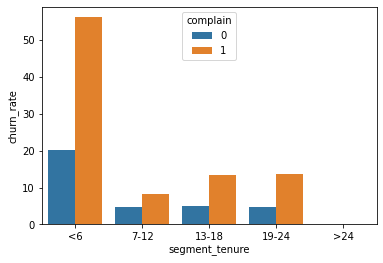

In [ ]:
sns.barplot(x='segment_tenure',y='churn_rate',data=df_complain_new, hue='complain', order=['<6','7-12','13-18','19-24','>24'])

- customer yang complain dengan tenure dibawah 6 bulan memiliki churn rate yang tinggi (>50%)
-  churn rate complain untuk customer yang tenure diatas 6 bulan jauh lebih rendah dibandingkan dibandingkan churn rate customer baru jika complain.

## DaySinceLastOrder

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_clean.csv')
df.sample(15)

In [ ]:
df[['DaySinceLastOrder']].describe()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='DaySinceLastOrder',hue='Churn')

Daysincelastorder dibagi 3 segment 0-4 = 'Low', 5-9 = 'Medium', 10-14 = 'High'

In [ ]:
def segmentate(row):
    if row.DaySinceLastOrder >= 0.0 and row.DaySinceLastOrder <= 4:
        return 'low'
    elif row.DaySinceLastOrder >= 5.0 and row.DaySinceLastOrder <= 9:
        return 'medium'
    else:
        return 'high'
df['Segmentation'] = df.apply(lambda row: segmentate(row), axis = 1)


In [ ]:
df_segment = df.groupby(['Segmentation','Churn'])['customer_id'].count().reset_index()
df_segment

In [ ]:
sns.countplot(data = df, x='Segmentation', hue='Churn', order=('low','medium','high'))

In [ ]:
df_daysince = df.groupby(['Segmentation','Churn']).agg({'Tenure':'median', 'CityTier':'median', 'WarehouseToHome':'median','HourSpendOnApp':'median',
       'NumberOfDeviceRegistered':'median', 'SatisfactionScore':'median','NumberOfAddress':'median', 'Complain':'median',
       'OrderAmountHikeFromlastYear':'median', 'CouponUsed':'median', 'OrderCount':'median','CashbackAmount':'median'}).reset_index()
df_daysince

In [ ]:
feature = ['Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore','NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','CashbackAmount']
#feature.columns
plt.figure(figsize=(20,18))
for i in range(0,len(feature)):
    plt.subplot(4,3, i+1)
    sns.barplot(data = df_daysince, x='Segmentation', y=feature[i], hue='Churn', order=('low','medium','high'))
    plt.tight_layout()

1. tenure: segmentasi daysince semakin naik semakin naik juga tenure saat tidak churn
2. city_tier: rata-rata tertinggi city pada segment high yang churn
3. warehouse: rata-rata jarak tertinggi pada segment high yg churn
4. hourspend: rata-rata pengguna app pada tiap segment sama
5. number_device: rata-rata device yg terdaftar pada tiap segment memiliki hasil yg sama
6. satisfaction: score satisfaction tertinggi terjadi pada segment high yg churn
7. complain: segment low dan medium yg churn memiliki rata-rata yg sama
8. orderAmount: pada segment low dan medium memiliki rata-rata yg sama di tiap churn dan tdk churn
9. cashbackAmount: rata-rata cashback makin naik di tiap segment

## CouponUsed

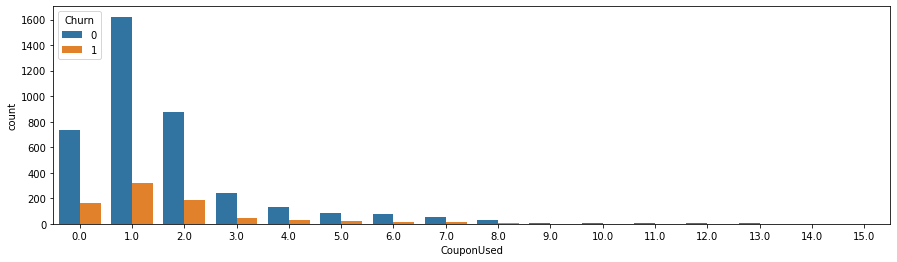

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='CouponUsed',hue='Churn')

## WareHouse to Home

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data_clean.csv to data_clean.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('data_clean.csv')

In [ ]:
def segment(x):
    if x['WarehouseToHome']>20:
        segment= '>21'
    elif x['WarehouseToHome']>15 and x['WarehouseToHome']<=20:
        segment='16-20'
    elif x['WarehouseToHome']>8 and x['WarehouseToHome']<=15:
        segment='11-15'
    elif x['WarehouseToHome']>6 and x['WarehouseToHome']<=10:
        segment='6-10'
    else: 
        segment='<6'
    return segment
        
df['segment_warehouse']=df.apply(lambda x: segment(x), axis=1)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,customer_id,segment_warehouse
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,0,<6
1,1,1.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1,6-10
2,1,1.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,2,>21
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,3,11-15
4,1,0.0,Phone,1,12.0,CC,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,4,11-15


In [ ]:
df_warehouse=df.groupby(['segment_warehouse','Churn']).size().unstack().reset_index()

In [ ]:
df_warehouse['total']=df_warehouse[0]+df_warehouse[1]
df_warehouse['churn_rate']=(df_warehouse[1]/df_warehouse['total'])*100

df_warehouse

Churn,segment_warehouse,0,1,total,churn_rate
0,11-15,1475,270,1745,15.472779
1,16-20,522,117,639,18.309859
2,6-10,637,93,730,12.739726
3,<6,393,102,495,20.606061
4,>21,856,227,1083,20.960295


In [ ]:
df_warehouse.drop(index=3,inplace=True)

df_warehouse['segment_warehouse'] = pd.Categorical(df_warehouse['segment_warehouse'],
                                   categories=['6-10','11-15','16-20','>21'],
                                   ordered=True)


df_warehouse

Churn,segment_warehouse,0,1,total,churn_rate
0,11-15,1475,270,1745,15.472779
1,16-20,522,117,639,18.309859
2,6-10,637,93,730,12.739726
4,>21,856,227,1083,20.960295


Text(0, 0.5, 'Churn Rate(%)')

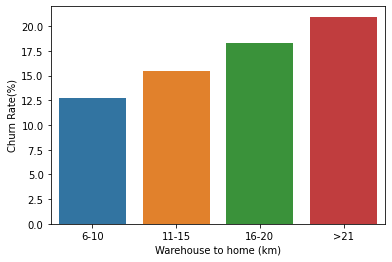

In [ ]:
sns.barplot(data=df_warehouse, x='segment_warehouse', y='churn_rate')
plt.xlabel('Warehouse to home (km)')
plt.ylabel('Churn Rate(%)')

- Semakin jauh tempat tinggal customer ke warehouse, semakin tinggi churn ratenya. penyebab:
  - Ongkos kirim
  - Lamanya waktu pengiriman

# Modelling

## XGBoost

In [ ]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving df_onehot.csv to df_onehot (3).csv


In [ ]:
data=pd.read_csv('df_onehot.csv')

In [ ]:
df=data.copy()
df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_stnd,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,customer_id
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93,-0.268456,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,1.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90,-1.246475,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1
2,1,1.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28,-1.262012,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,2
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07,-0.916460,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,1,0.0,1,12.0,0.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60,-1.028470,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,0,5.0,1,12.0,4.0,4,5,2,0,20.0,2.0,2.0,3.0,224.36,1.346041,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,4687
4688,0,1.0,3,12.0,2.0,5,3,2,0,19.0,2.0,2.0,1.0,154.66,-0.400512,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,4688
4689,0,13.0,1,13.0,3.0,5,5,6,0,16.0,1.0,2.0,3.0,224.91,1.359823,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,4689
4690,0,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42,0.395335,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,4690


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['WarehouseToHome_norm'] = MinMaxScaler().fit_transform(df['WarehouseToHome'].values.reshape(len(df), 1)) #format harus array makanya diubah
df['HourSpendOnApp_norm'] = MinMaxScaler().fit_transform(df['HourSpendOnApp'].values.reshape(len(df), 1))
df['NumberOfDeviceRegistered_norm'] = MinMaxScaler().fit_transform(df['NumberOfDeviceRegistered'].values.reshape(len(df), 1))
df['SatisfactionScore_norm'] = MinMaxScaler().fit_transform(df['SatisfactionScore'].values.reshape(len(df), 1))
df['NumberOfAddress_norm'] = MinMaxScaler().fit_transform(df['NumberOfAddress'].values.reshape(len(df), 1)) #format harus array makanya diubah
df['OrderAmountHikeFromlastYear_norm'] = MinMaxScaler().fit_transform(df['OrderAmountHikeFromlastYear'].values.reshape(len(df), 1))
df['CouponUsed_norm'] = MinMaxScaler().fit_transform(df['CouponUsed'].values.reshape(len(df), 1))
df['OrderCount_norm'] = MinMaxScaler().fit_transform(df['OrderCount'].values.reshape(len(df), 1))
df['DaySinceLastOrder_norm'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))

In [ ]:
df=df.drop(columns=['WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder'])

In [ ]:
X=df.drop(columns=['customer_id','Churn', 'CityTier','CashbackAmount', 'Gender_Female', 'Gender_Male','MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single','PreferedOrderCat_Others','PreferredLoginDevice_Mobile Phone','PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_CC','PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI'])
          
y=df['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

### XGBoost default

In [ ]:
!pip uninstall xgboost
!pip install xgboost==1.3.3

import xgboost
print(xgboost.__version__)

Found existing installation: xgboost 1.3.3
Uninstalling xgboost-1.3.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-1.3.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost.libs/libgomp-f7e03b3e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/xgboost/*
Proceed (y/n)? y
  Successfully uninstalled xgboost-1.3.3
  Using cached xgboost-1.3.3-py3-none-manylinux2010_x86_64.whl (157.5 MB)
1.3.3


In [ ]:
from xgboost import XGBClassifier

model=XGBClassifier(random_state=123)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_train_predict=model.predict(X_train)


[12:03:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[784   8]
 [ 16 131]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       792
           1       0.94      0.89      0.92       147

    accuracy                           0.97       939
   macro avg       0.96      0.94      0.95       939
weighted avg       0.97      0.97      0.97       939



### XGBoost Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(0, 15, num = 16)],
                    'min_child_weight' : [int(x) for x in np.linspace(0, 20, num = 21)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'scale_pos_weight':[5],
     'n_estimators': [100]
                    }

# Init
xg = XGBClassifier(random_state=123, eval_metric='logloss')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=123, scoring='recall')

xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_predict=xg_tuned.predict(X_test)
y_train_predict=xg_tuned.predict(X_train)

In [ ]:
#weight 5
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[733  59]
 [  9 138]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       792
           1       0.70      0.94      0.80       147

    accuracy                           0.93       939
   macro avg       0.84      0.93      0.88       939
weighted avg       0.94      0.93      0.93       939



In [ ]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
        
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 7
Best min_child_weight: 13
Best gamma: 0.1
Best tree_method: approx
Best colsample_bytree: 0.30000000000000004
Best eta: 0.16161616161616163
Best lambda: 0.0
Best alpha: 1.0
Best scale_pos_weight: 5
Best n_estimators: 100


### XGBoost early stopping

In [ ]:
xg_best = XGBClassifier(random_state=123, max_depth=7, min_child_weight=13, gamma=0.1, tree_method='approx', colsample_bytree=0.30000000000000004, eta= 0.16161616161616163, reg_lambda= 0.0, alpha= 1, scale_pos_weight= 5)
xg_best.fit(X_train, y_train, eval_metric=['logloss','error'], eval_set=[(X_train, y_train),(X_test, y_test)], verbose=1)

y_predict = xg_best.predict(X_test)
y_train_predict=xg_best.predict(X_train)

[0]	validation_0-logloss:0.62955	validation_0-error:0.20597	validation_1-logloss:0.62883	validation_1-error:0.19915
[1]	validation_0-logloss:0.58313	validation_0-error:0.19611	validation_1-logloss:0.58249	validation_1-error:0.19489
[2]	validation_0-logloss:0.54834	validation_0-error:0.17932	validation_1-logloss:0.54780	validation_1-error:0.16826
[3]	validation_0-logloss:0.53779	validation_0-error:0.17586	validation_1-logloss:0.53787	validation_1-error:0.16826
[4]	validation_0-logloss:0.51546	validation_0-error:0.17666	validation_1-logloss:0.51518	validation_1-error:0.16720
[5]	validation_0-logloss:0.49289	validation_0-error:0.16120	validation_1-logloss:0.49568	validation_1-error:0.15868
[6]	validation_0-logloss:0.48607	validation_0-error:0.15641	validation_1-logloss:0.48988	validation_1-error:0.15335
[7]	validation_0-logloss:0.47278	validation_0-error:0.14975	validation_1-logloss:0.47684	validation_1-error:0.14483
[8]	validation_0-logloss:0.46333	validation_0-error:0.15081	validation_1

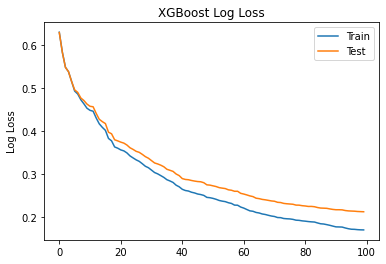

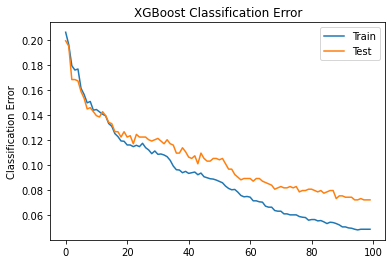

In [ ]:
results = xg_best.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification Error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [ ]:
results['validation_0']['error'].index(min(results['validation_0']['error']))

95

In [ ]:
from xgboost import XGBClassifier
xg_best =XGBClassifier(random_state=123, max_depth=7, min_child_weight=13, gamma=0.1, tree_method='approx', colsample_bytree=0.30000000000000004, eta= 0.16161616161616163, reg_lambda= 0.0, alpha= 1, scale_pos_weight=5)
xg_best.fit(X_train, y_train, eval_metric=['logloss','error'], eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False, early_stopping_rounds=95) 

y_predict = xg_best.predict(X_test)
y_train_predict=xg_best.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[732  60]
 [  8 139]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       792
           1       0.70      0.95      0.80       147

    accuracy                           0.93       939
   macro avg       0.84      0.93      0.88       939
weighted avg       0.94      0.93      0.93       939



## Confusion Matrix

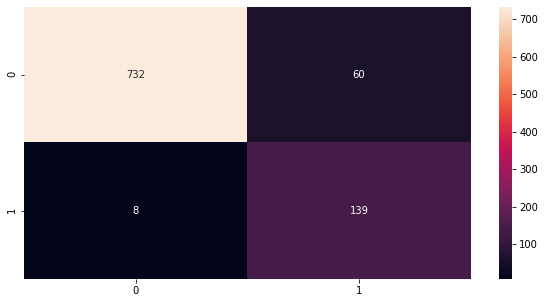

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 
cf_matrix=confusion_matrix(y_test,y_predict)
sns.heatmap(cf_matrix, annot=True, fmt='g')

### Feature Importance XGBoost

     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491648 sha256=8090706555f4c272f2014b364cc13d2c07bb37a7af7b975ccec6501667145626
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


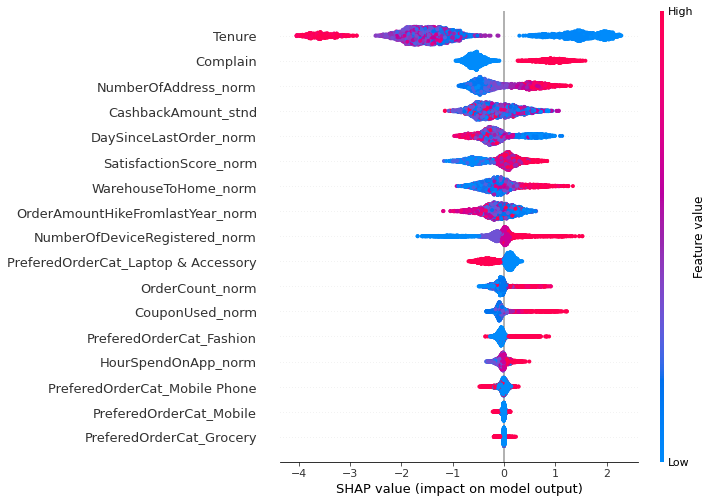

In [ ]:
!pip install shap
import shap

explainer=shap.TreeExplainer(xg_best)
Shap_values=explainer.shap_values(X)
shap.summary_plot(Shap_values, X)